In [1]:
import numpy as np
import matplotlib.pyplot as plt
import longitudinal as lde
%matplotlib notebook

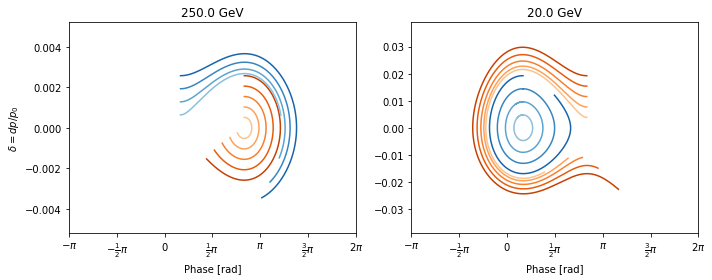

In [2]:
turns=500
sin_phi_s=0.5
#phi_s=0
energy_list=[250e9,20e9]
mass=0.938e9
harm=360
voltage=5e6
mcf=0.0018
update_eta=True

#print(height)

# Vicinity of the pi-phi_s
fig,ax=plt.subplots(1,2,figsize=(10,4))

npar=5
result_g1=[]
for i in range(len(energy_list)):
    beam_energy=energy_list[i]
    gamma=beam_energy/mass
    eta=mcf-1/gamma/gamma
    beta=np.sqrt(1-1/gamma/gamma)
    phi_s=np.arcsin(sin_phi_s)
    yf=np.sqrt(np.cos(phi_s)-(np.pi-2*phi_s)*np.sin(phi_s)/2)
    height=2*np.sqrt(voltage/2/np.pi/beta/beta/beam_energy/harm/np.abs(eta))*yf
    
    initial_phi=np.ones(npar)*(np.pi-phi_s)
    initial_delta=np.linspace(height/npar, height*0.99, npar)
    temp=lde.longitudinal_evolve_delta(turns, 
                                       initial_phi,
                                       initial_delta,
                                       sin_phi_s=sin_phi_s, alphac=mcf, E0_ini=beam_energy,
                                       mass=mass, e_volt=voltage, harm=harm,
                                       update_eta=update_eta
                                      )
    result_g1.append(temp)

# Vicinity of the phi_s

result_g2=[]
for i in range(len(energy_list)):
    beam_energy=energy_list[i]
    gamma=beam_energy/mass
    eta=mcf-1/gamma/gamma
    beta=np.sqrt(1-1/gamma/gamma)
    phi_s=np.arcsin(sin_phi_s)
    yf=np.sqrt(np.cos(phi_s)-(np.pi-2*phi_s)*np.sin(phi_s)/2)
    height=2*np.sqrt(voltage/2/np.pi/beta/beta/beam_energy/harm/np.abs(eta))*yf
    ax[i].set_ylim([-2*height,2*height])
    initial_phi=np.ones(npar)*(phi_s)
    initial_delta=np.linspace(0, height*0.99, npar)
    temp=lde.longitudinal_evolve_delta(turns, 
                                       initial_phi,
                                       initial_delta,
                                       sin_phi_s=sin_phi_s, alphac=mcf, E0_ini=beam_energy,
                                       mass=mass, e_volt=voltage, harm=harm, 
                                       update_eta= update_eta
                                      )
    result_g2.append(temp)


for i in range(2):
    ax[i].set_aspect('auto')
    ax[i].set_title("{} GeV".format(energy_list[i]/1e9))
    ax[i].set_xlabel('Phase [rad]')
    
    ax[i].set_xlim([-np.pi,2*np.pi])
    
    ax[i].set_prop_cycle(plt.cycler('color', plt.cm.Oranges(np.linspace(0.3, 0.8, npar))))
    ax[i].plot(result_g1[i][0], result_g1[i][1], linestyle=None)
    ax[i].set_prop_cycle(plt.cycler('color', plt.cm.Blues(np.linspace(0.3, 0.8, npar))))
    ax[i].plot(result_g2[i][0], result_g2[i][1], linestyle=None)
    ax[i].set_xticks([-np.pi, -0.5*np.pi, 0., .5*np.pi, np.pi, 1.5*np.pi, 2*np.pi])
    ax[i].set_xticklabels([r"$-\pi$", r"$-\frac{1}{2}\pi$", "$0$", r"$\frac{1}{2}\pi$",
                     r"$\pi$", r"$\frac{3}{2}\pi$", r"$2\pi$"])
ax[0].set_ylabel(r'$\delta=dp/p_0$')
plt.tight_layout()


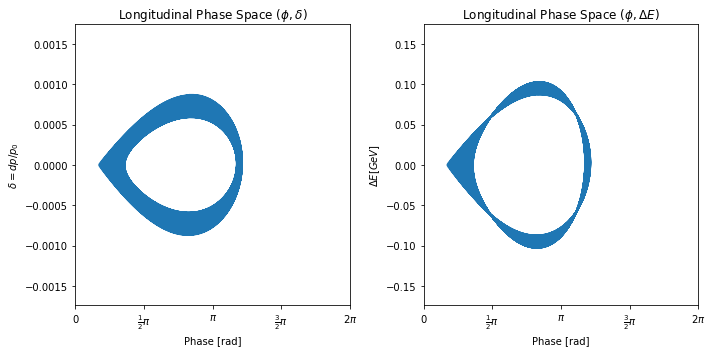

In [7]:
turns=30000
sin_phi_s=0.5

beam_energy=100e9
mass=0.938e9
harm=360
voltage=5e6

update_eta=True
# Gamma and Betas 
gamma=beam_energy/mass

mcf=0.04

eta=mcf-1/gamma/gamma
beta=np.sqrt(1-1/gamma/gamma)

# Calculate the bucket height
phi_s=np.arcsin(sin_phi_s)
yf=np.sqrt(np.cos(phi_s)-(np.pi-2*phi_s)*np.sin(phi_s)/2)
height=2*np.sqrt(voltage/2/np.pi/beta/beta/beam_energy/harm/np.abs(eta))*yf
#print(height)



phi_0=np.pi-phi_s
#phi_0=phi_s
delta_0=height*1.0*beam_energy

# Use phi-delta phase space
npar=1
initial_phi=np.ones(npar)*(phi_0)
initial_de=np.ones(npar)*delta_0

result=lde.longitudinal_evolve(turns, 
                                       initial_phi,
                                       initial_de,
                                       sin_phi_s=sin_phi_s, alphac=mcf, E0_ini=beam_energy,
                                       mass=mass, e_volt=voltage, harm=harm,
                                       update_eta=update_eta, energy_change=True
                                      )


fig,(ax1,ax2)=plt.subplots(1,2, figsize=(10,5))
ax1.set_title(r"Longitudinal Phase Space $(\phi,\delta)$")
ax2.set_title(r"Longitudinal Phase Space $(\phi,\Delta E)$")
ax1.set_xlabel('Phase [rad]')
ax2.set_xlabel('Phase [rad]')
ax1.set_ylabel(r'$\delta=dp/p_0$')
ax2.set_ylabel(r'$\Delta E [GeV]$')
#ax1.set_xlim([-np.pi,np.pi])
ax1.set_ylim([-2*height,2*height])
ax2.set_ylim([-2*height*beam_energy/1e9,2*height*beam_energy/1e9])
#ax1.set_prop_cycle(plt.cycler('color', plt.cm.Oranges(np.linspace(0, 1, 8))))
ax1.plot(result[0], result[2], linestyle=None)
#ax2.set_prop_cycle(plt.cycler('color', plt.cm.Blues(np.linspace(0, 1, 8))))
ax2.plot(result[0], result[1]/1e9, linestyle=None)

for ax in (ax1,ax2):
    ax.set_xticks([-np.pi, -0.5*np.pi, 0., .5*np.pi, np.pi, 1.5*np.pi, 2*np.pi])
    ax.set_xticklabels([r"$-\pi$", r"$-\frac{1}{2}\pi$", "$0$", r"$\frac{1}{2}\pi$",
                     r"$\pi$", r"$\frac{3}{2}\pi$", r"$2\pi$"])
    ax.set_xlim([-0,2*np.pi])
plt.tight_layout()

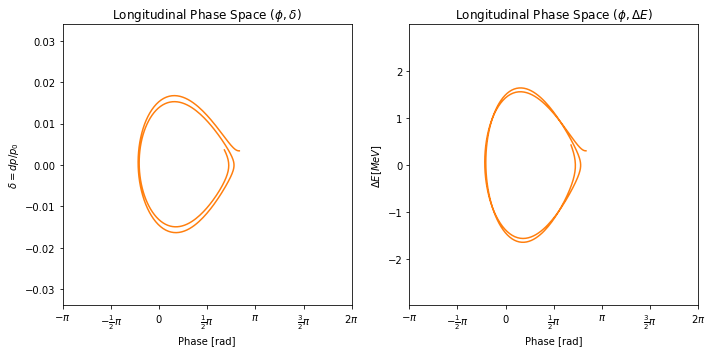

In [9]:
turns=300
sin_phi_s=0.5

mass=0.938e9
beam_energy=45e6+mass
p0=np.sqrt(beam_energy*beam_energy-mass*mass)
harm=1
voltage=0.1e6
mcf=0.05
update_eta=True
# Gamma and Betas 
gamma=beam_energy/mass
eta=mcf-1/gamma/gamma
beta=np.sqrt(1-1/gamma/gamma)

# Calculate the bucket height
phi_s=np.arcsin(sin_phi_s)
yf=np.sqrt(np.cos(phi_s)-(np.pi-2*phi_s)*np.sin(phi_s)/2)
height=2*np.sqrt(voltage/2/np.pi/beta/beta/beam_energy/harm/np.abs(eta))*yf
#print(height)


phi_0=np.pi-phi_s
#phi_0=phi_s
delta_E=.3e6 ## MeV
delta_P=np.sqrt((beam_energy+delta_E)*(beam_energy+delta_E)-mass*mass)/p0-1
# Use phi-delta phase space
npar=2
initial_phi=np.ones(npar)*(phi_0)
initial_de=np.linspace(0,1, npar)*delta_E

result=lde.longitudinal_evolve(turns, 
                                       initial_phi,
                                       initial_de,
                                       sin_phi_s=sin_phi_s, alphac=mcf, E0_ini=beam_energy,
                                       mass=mass, e_volt=voltage, harm=harm,
                                       update_eta=update_eta, energy_change=True
                                      )

fig,(ax1,ax2)=plt.subplots(1,2, figsize=(10,5))
ax1.set_title(r"Longitudinal Phase Space $(\phi,\delta)$")
ax2.set_title(r"Longitudinal Phase Space $(\phi,\Delta E)$")
ax1.set_xlabel('Phase [rad]')
ax2.set_xlabel('Phase [rad]')
ax1.set_ylabel(r'$\delta=dp/p_0$')
ax2.set_ylabel(r'$\Delta E [MeV]$')
#ax1.set_xlim([-np.pi,np.pi])
ax1.set_ylim([-2*height,2*height])
ax2.set_ylim([-2*height*beam_energy*beta*beta/1e6,2*height*beta*beta*beam_energy/1e6])
#ax1.set_prop_cycle(plt.cycler('color', plt.cm.Oranges(np.linspace(0, 1, 8))))
ax1.plot(result[0], result[2], linestyle=None)
#ax2.set_prop_cycle(plt.cycler('color', plt.cm.Blues(np.linspace(0, 1, 8))))
ax2.plot(result[0], result[1]/1e6, linestyle=None)

for ax in (ax1,ax2):
    ax.set_xticks([-np.pi, -0.5*np.pi, 0., .5*np.pi, np.pi, 1.5*np.pi, 2*np.pi])
    ax.set_xticklabels([r"$-\pi$", r"$-\frac{1}{2}\pi$", "$0$", r"$\frac{1}{2}\pi$",
                     r"$\pi$", r"$\frac{3}{2}\pi$", r"$2\pi$"])
    ax.set_xlim([-np.pi,2*np.pi])
plt.tight_layout()


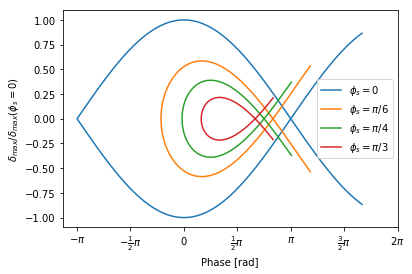

In [10]:
# Bucket shape for eta < 0
import scipy.optimize as opt

#phi_s=np.pi/3
def fangle(phi, phis):
    return (np.cos(phi)+np.cos(phis)-np.sin(phis)*(np.pi-phi-phis))/2.0

def gen_plot_data(phis):
    phi_u=opt.fsolve(fangle, (phis-np.pi)/3.0, args=(phis,))
    extra=(np.pi-phis-phi_u)/3.0
    phi_list=np.linspace(phi_u, np.pi-phis+extra,300)
    delta_list=np.sqrt(np.abs(fangle(phi_list, phis)))
    return np.concatenate([ np.flip(phi_list,0), phi_list]),np.concatenate([np.flip(delta_list,0), -delta_list])

fig,ax=plt.subplots()
ax.set_xlabel("Phase [rad]")
ax.set_ylabel(r"$\delta_{max}/\delta_{max}(\phi_s=0)$")
temp=gen_plot_data(1e-8)
ax.plot(temp[0],temp[1], label=r"$\phi_s=0$")

temp=gen_plot_data(np.pi/6)
ax.plot(temp[0],temp[1], label=r"$\phi_s=\pi/6$")

temp=gen_plot_data(np.pi/4)
ax.plot(temp[0],temp[1], label=r"$\phi_s=\pi/4$")

temp=gen_plot_data(np.pi/3)
ax.plot(temp[0],temp[1], label=r"$\phi_s=\pi/3$")
#ax.plot(phi_list,-delta_list, c='b')
ax.set_xticks([-np.pi, -0.5*np.pi, 0., .5*np.pi, np.pi, 1.5*np.pi, 2*np.pi])
ax.set_xticklabels([r"$-\pi$", r"$-\frac{1}{2}\pi$", "$0$", r"$\frac{1}{2}\pi$",
                     r"$\pi$", r"$\frac{3}{2}\pi$", r"$2\pi$"])

ax.legend(loc='best')